In [1]:
# %load command.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

%config InlineBackend.figure_format='svg'
plt.rcParams['figure.dpi']=120

pd.options.display.float_format='{:,.2f}'.format
pd.set_option('display.max_colwidth', None)

def load_data(data):
    return pd.read_csv(data)
    
data=str(input('Enter the full_path of data source '))


Enter the full_path of data source train.csv


In [2]:
df=load_data(data)
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                    Name     Sex   Age  SibSp  \
0                                Braund, Mr. Owen Harris    male 22.00      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female 38.00      1   
2                                 Heikkinen, Miss. Laina  female 26.00      0   
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)  female 35.00      1   
4                               Allen, Mr. William Henry    male 35.00      0   
..                                                   ...     ...   ...    ...   
886                                Montvila, Rev. Juozas    male 27.00      0   
887                         Graham, Miss. Margaret Edith  female 19.00      0   
888             Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                                Behr, Mr. Karl Howell    male 26.00      0   
890                                  Dooley, Mr. Patrick    male 32.00      0   

     Parch            Ticket  Fare Cabin Embarked  
0        0         A/5 21171  7.25   NaN        S  
1        0          PC 17599 71.28   C85        C  
2        0  STON/O2. 3101282  7.92   NaN        S  
3        0            113803 53.10  C123        S  
4        0            373450  8.05   NaN        S  
..     ...               ...   ...   ...      ...  
886      0            211536 13.00   NaN        S  
887      0            112053 30.00   B42        S  
888      2        W./C. 6607 23.45   NaN        S  
889      0            111369 30.00  C148        C  
890      0            370376  7.75   NaN        Q  

[891 rows x 12 columns]

(<Figure size 960x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x26b36333708>)

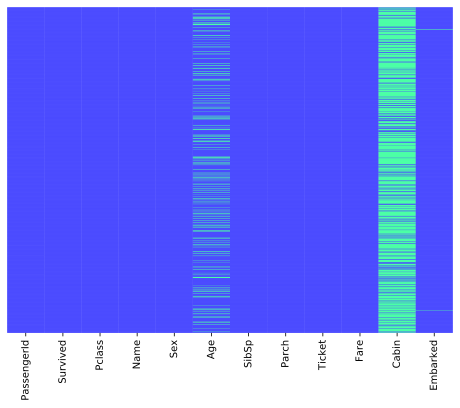

In [3]:
plt.subplots(figsize=(8,6))
sns.heatmap(df.isnull(),
           yticklabels=False,
           cbar=False,
           cmap='winter')

### Task

Suppose we have been asked to take a look at passengers departed from Southampton, and calculate the survival rate for different age groups and Pclass.

 - Data cleaning: replace the missing Age with some form of imputation
 - Select passengers departed from Southampton
 - Convert ages to groups of age ranges: ≤12, Teen (≤ 18), Adult (≤ 60) and Older (>60)
 - Create a pivot table to display the survival rate for different age groups and Pclass
 - Improve the display of pivot table by renaming axis labels and formatting value.


The mean value of pclass 1 is 38.23
The mean value of pclass 2 is 29.88
The mean value of pclass 3 is 25.14

{1: 38.23, 2: 29.88, 3: 25.14}



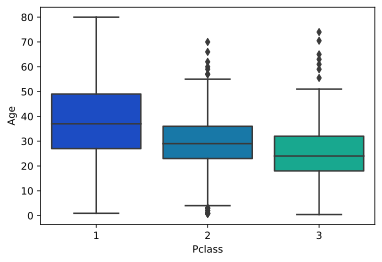

In [4]:
# Data cleaning: replace the missing ages with some form of imputation

sns.boxplot(x='Pclass',
           y='Age',
           data=df,
           palette='winter')

pclass_1_mean=df[df['Pclass']==1]['Age'].mean()
pclass_1_mean=round(pclass_1_mean, 2)
pclass_2_mean=df[df['Pclass']==2]['Age'].mean()
pclass_2_mean=round(pclass_2_mean, 2)
pclass_3_mean=df[df['Pclass']==3]['Age'].mean()
pclass_3_mean=round(pclass_3_mean, 2)
print('The mean value of pclass 1 is {}'.format(pclass_1_mean))
print('The mean value of pclass 2 is {}'.format(pclass_2_mean))
print('The mean value of pclass 3 is {}'.format(pclass_3_mean))

print()

pclass_age_map={1: pclass_1_mean,
               2: pclass_2_mean,
               3:pclass_3_mean}

print(pclass_age_map)
print()

In [5]:
cond=df['Age'].isna()
df[cond]
print()

res=df.loc[cond, 'Pclass'].map(pclass_age_map)
res

PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex  Age  SibSp  Parch      Ticket  Fare Cabin Embarked  
5      male  NaN      0      0      330877  8.46   NaN        Q  
17     male  NaN      0      0      244373 13.00   NaN        S  
19   female  NaN      0      0        2649  7.22   NaN        C  
26     male  NaN      0      0        2631  7.22   NaN        C  
28   female  NaN      0      0      330959  7.88   NaN        Q  
..      ...  ...    ...    ...         ...   ...   ...      ...  
859    male  NaN      0      0        2629  7.23   NaN        C  
863  female  NaN      8      2    CA. 2343 69.55   NaN        S  
868    male  NaN      0      0      345777  9.50   NaN        S  
878    male  NaN      0      0      349217  7.90   NaN        S  
888  female  NaN      1      2  W./C. 6607 23.45   NaN        S  

[177 rows x 12 columns]

5     25.14
17    29.88
19    25.14
26    25.14
28    25.14
       ... 
859   25.14
863   25.14
868   25.14
878   25.14
888   25.14
Name: Pclass, Length: 177, dtype: float64

In [6]:
df.loc[cond, 'Age']=res
df.head(20)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   

                                                       Name     Sex   Age  \
0                                   Braund, Mr. Owen Harris    male 22.00   
1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female 38.00   
2                                    Heikkinen, Miss. Laina  female 26.00   
3              Futrelle, Mrs. Jacques Heath (Lily May Peel)  female 35.00   
4                                  Allen, Mr. William Henry    male 35.00   
5                                          Moran, Mr. James    male 25.14   
6                                   McCarthy, Mr. Timothy J    male 54.00   
7                            Palsson, Master. Gosta Leonard    male  2.00   
8         Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female 27.00   
9                       Nasser, Mrs. Nicholas (Adele Achem)  female 14.00   
10                          Sandstrom, Miss. Marguerite Rut  female  4.00   
11                                 Bonnell, Miss. Elizabeth  female 58.00   
12                           Saundercock, Mr. William Henry    male 20.00   
13                              Andersson, Mr. Anders Johan    male 39.00   
14                     Vestrom, Miss. Hulda Amanda Adolfina  female 14.00   
15                         Hewlett, Mrs. (Mary D Kingcome)   female 55.00   
16                                     Rice, Master. Eugene    male  2.00   
17                             Williams, Mr. Charles Eugene    male 29.88   
18  Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)  female 31.00   
19                                  Masselmani, Mrs. Fatima  female 25.14   

    SibSp  Parch            Ticket  Fare Cabin Embarked  
0       1      0         A/5 21171  7.25   NaN        S  
1       1      0          PC 17599 71.28   C85        C  
2       0      0  STON/O2. 3101282  7.92   NaN        S  
3       1      0            113803 53.10  C123        S  
4       0      0            373450  8.05   NaN        S  
5       0      0            330877  8.46   NaN        Q  
6       0      0             17463 51.86   E46        S  
7       3      1            349909 21.07   NaN        S  
8       0      2            347742 11.13   NaN        S  
9       1      0            237736 30.07   NaN        C  
10      1      1           PP 9549 16.70    G6        S  
11      0      0            113783 26.55  C103        S  
12      0      0         A/5. 2151  8.05   NaN        S  
13      1      5            347082 31.27   NaN        S  
14      0      0            350406  7.85   NaN        S  
15      0      0            248706 16.00   NaN        S  
16      4      1            382652 29.12   NaN        Q  
17      0      0            244373 13.00   NaN        S  
18      1      0            345763 18.00   NaN        S  
19      0      0              2649  7.22   NaN        C

In [7]:
def replace_age_na(x_df, fill_map):
    cond=x_df['Age'].isna()
    res=x_df.loc[cond, 'Pclass'].map(fill_map) # create mapped series according to Pclass
    x_df.loc[cond, 'Age']=res
    return x_df

In [8]:
res=(pd.read_csv('train.csv')
    .pipe(replace_age_na, pclass_age_map))

res.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male 22.00      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female 38.00      1   
2                               Heikkinen, Miss. Laina  female 26.00      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female 35.00      1   
4                             Allen, Mr. William Henry    male 35.00      0   

   Parch            Ticket  Fare Cabin Embarked  
0      0         A/5 21171  7.25   NaN        S  
1      0          PC 17599 71.28   C85        C  
2      0  STON/O2. 3101282  7.92   NaN        S  
3      0            113803 53.10  C123        S  
4      0            373450  8.05   NaN        S

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

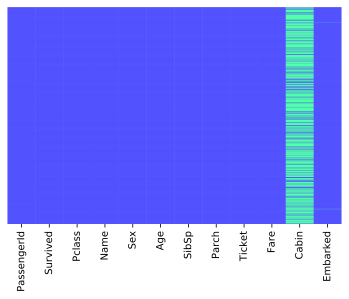

In [9]:
sns.heatmap(df.isnull(),
           yticklabels=False,
           cbar=False,
           cmap='winter')

print()
df.isnull().sum()

In [10]:
res=(pd.read_csv('train.csv')
    .pipe(replace_age_na, pclass_age_map)
    .query('Embarked=="S"'))

res.head(20)

PassengerId  Survived  Pclass  \
0             1         0       3   
2             3         1       3   
3             4         1       1   
4             5         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
17           18         1       2   
18           19         0       3   
20           21         0       2   
21           22         1       2   
23           24         1       1   
24           25         0       3   
25           26         1       3   

                                                         Name     Sex   Age  \
0                                     Braund, Mr. Owen Harris    male 22.00   
2                                      Heikkinen, Miss. Laina  female 26.00   
3                Futrelle, Mrs. Jacques Heath (Lily May Peel)  female 35.00   
4                                    Allen, Mr. William Henry    male 35.00   
6                                     McCarthy, Mr. Timothy J    male 54.00   
7                              Palsson, Master. Gosta Leonard    male  2.00   
8           Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female 27.00   
10                            Sandstrom, Miss. Marguerite Rut  female  4.00   
11                                   Bonnell, Miss. Elizabeth  female 58.00   
12                             Saundercock, Mr. William Henry    male 20.00   
13                                Andersson, Mr. Anders Johan    male 39.00   
14                       Vestrom, Miss. Hulda Amanda Adolfina  female 14.00   
15                           Hewlett, Mrs. (Mary D Kingcome)   female 55.00   
17                               Williams, Mr. Charles Eugene    male 29.88   
18    Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)  female 31.00   
20                                       Fynney, Mr. Joseph J    male 35.00   
21                                      Beesley, Mr. Lawrence    male 34.00   
23                               Sloper, Mr. William Thompson    male 28.00   
24                              Palsson, Miss. Torborg Danira  female  8.00   
25  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)  female 38.00   

    SibSp  Parch            Ticket  Fare Cabin Embarked  
0       1      0         A/5 21171  7.25   NaN        S  
2       0      0  STON/O2. 3101282  7.92   NaN        S  
3       1      0            113803 53.10  C123        S  
4       0      0            373450  8.05   NaN        S  
6       0      0             17463 51.86   E46        S  
7       3      1            349909 21.07   NaN        S  
8       0      2            347742 11.13   NaN        S  
10      1      1           PP 9549 16.70    G6        S  
11      0      0            113783 26.55  C103        S  
12      0      0         A/5. 2151  8.05   NaN        S  
13      1      5            347082 31.27   NaN        S  
14      0      0            350406  7.85   NaN        S  
15      0      0            248706 16.00   NaN        S  
17      0      0            244373 13.00   NaN        S  
18      1      0            345763 18.00   NaN        S  
20      0      0            239865 26.00   NaN        S  
21      0      0            248698 13.00   D56        S  
23      0      0            113788 35.50    A6        S  
24      3      1            349909 21.07   NaN        S  
25      1      5            347077 31.39   NaN        S

In [11]:
res['Embarked'].value_counts()

S    644
Name: Embarked, dtype: int64

In [12]:
# Convert ages to groups of age ranges: ≤12, Teen (≤ 18), Adult (≤ 60) and Older (>60)
import sys
bins=[0, 13, 19, 61, sys.maxsize]
labels=['<12', 'Teen', 'Adult', 'Older']

res=(pd.read_csv('train.csv')
    .pipe(replace_age_na, pclass_age_map)
    .query('Embarked=="S"')
    .assign(ageGroup=lambda x:pd.cut(x['Age'], bins=bins, labels=labels)))

res.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
6            7         0       1   

                                           Name     Sex   Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    male 22.00      1      0   
2                        Heikkinen, Miss. Laina  female 26.00      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female 35.00      1      0   
4                      Allen, Mr. William Henry    male 35.00      0      0   
6                       McCarthy, Mr. Timothy J    male 54.00      0      0   

             Ticket  Fare Cabin Embarked ageGroup  
0         A/5 21171  7.25   NaN        S    Adult  
2  STON/O2. 3101282  7.92   NaN        S    Adult  
3            113803 53.10  C123        S    Adult  
4            373450  8.05   NaN        S    Adult  
6             17463 51.86   E46        S    Adult

Pclass      1    2    3
ageGroup               
<12      0.75 1.00 0.37
Teen     0.80 0.40 0.18
Adult    0.58 0.41 0.17
Older    0.25 0.33 0.50

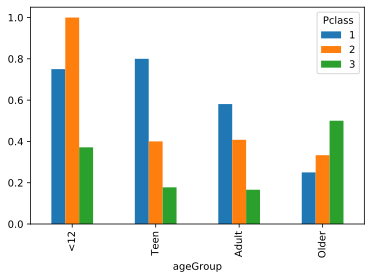

In [13]:
# Create a pivot table to display the survival rate for different age groups and Pclass

res=(pd.read_csv('train.csv')
    .pipe(replace_age_na, pclass_age_map)
    .query('Embarked=="S"')
    .assign(ageGroup=lambda x:pd.cut(x['Age'], bins=bins, labels=labels))
    .pivot_table(index='ageGroup', values='Survived', columns='Pclass', aggfunc='mean'))

res.head()

res.plot(kind='bar')

In [14]:
res=(pd.read_csv('train.csv')
    .pipe(replace_age_na, pclass_age_map)
    .query('Embarked=="S"')
    .assign(ageGroup=lambda x:pd.cut(x['Age'], bins=bins, labels=labels))
    .pivot_table(index='ageGroup', values='Survived', columns='Pclass', aggfunc='mean')
    .rename_axis('', axis='columns')
    .rename('Class {}'.format, axis='columns')
    .style.format('{:.2%}'))

res

